In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

*Briefly look at dataset and its shape, there are string-columns*

In [48]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
data.shape

(205, 26)

*All cells are not empty - we do not have to fill them with some values*

In [50]:
print(data.info())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

*In case we need to replace nans - function provided below*

In [51]:
def replace_nan(df, column, classified_column = False, random_state = 42, **type):
    np.random.seed(random_state)
    
    mean_value = df[column].mean()
    std_value = df[column].std()
    max_value = df[column].max()
    nan_indices = df[df[column].isnull()].index
    if classified_column:
        random_values = np.random.randint(low=0, high=int(max_value), size=len(nan_indices))
    else:
        if type == 'float':
            random_values = np.random.uniform(low=0, high=mean_value + 3 * std_value, size=len(nan_indices))
        else:
            random_values = np.random.randint(low=0, high=int(mean_value + 3 * std_value), size=len(nan_indices))
    
    df.loc[nan_indices, column] = random_values

*Drop non-informative columns*

In [52]:
data = data.drop(['car_ID', 'CarName'], axis = 1)

*With LabelEncoder we transfrom string-values to numbers (from 0 to n-1 where n number of different outputs)*

In [53]:
data[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
      'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']] = data[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
      'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']].apply(LabelEncoder().fit_transform)

*Successfully transformed*

In [54]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [55]:
data.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


*Plot correlation matrix*

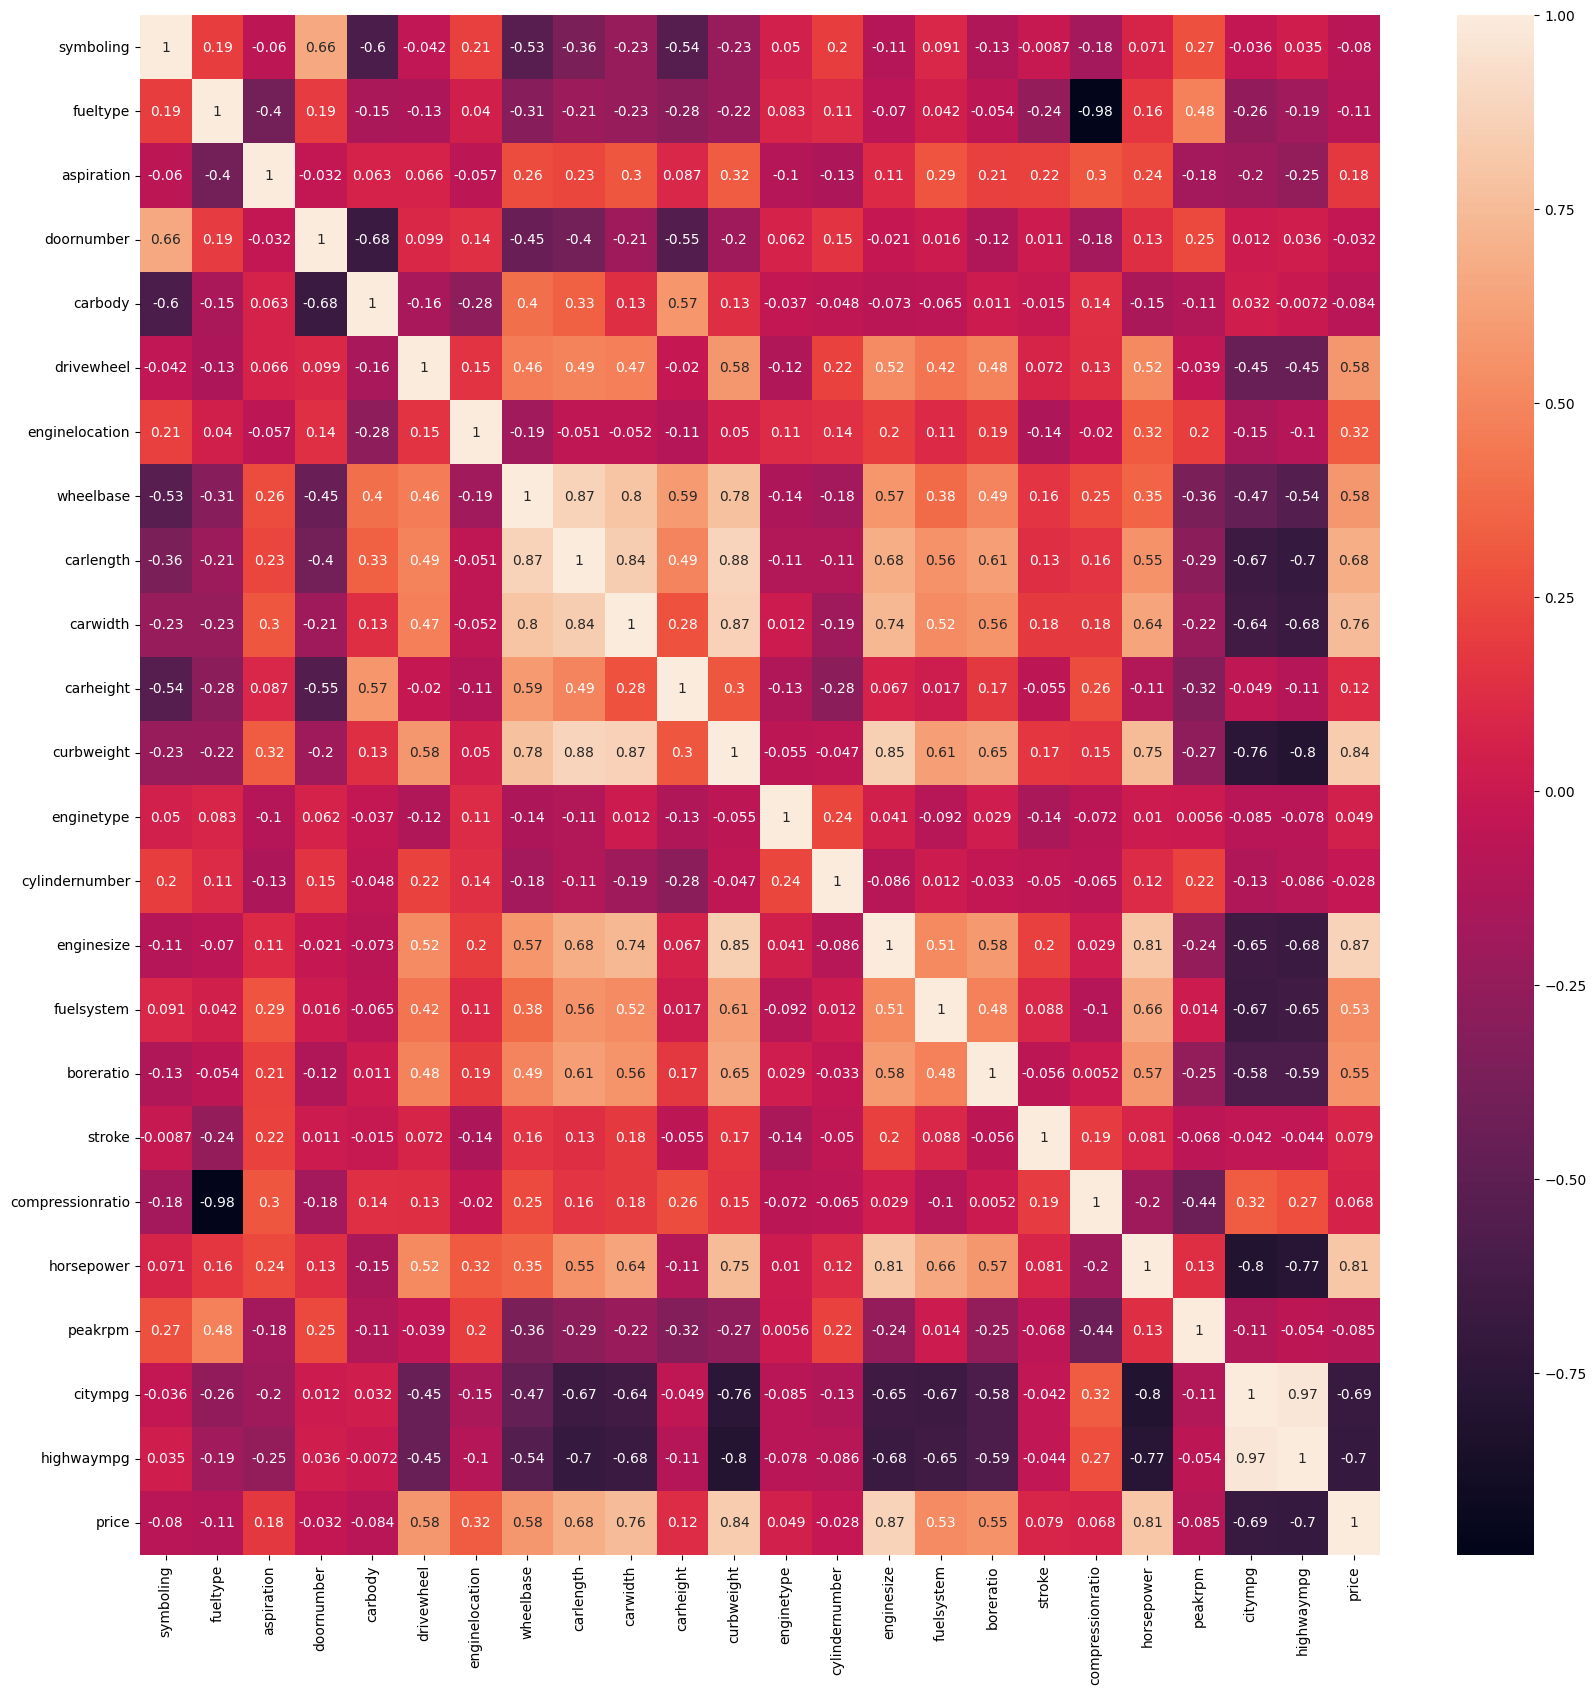

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

*Correlation between features and targer_value - price (sorted by descending)*

In [57]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumber         -0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

*Plot the pairplot - scatter and bar plots (only for half of features due to large number of them present in dataset (i chose with good correlation and mostly initially not-string )) for feature vs feature and feature vs target value*

<Figure size 4000x4000 with 0 Axes>

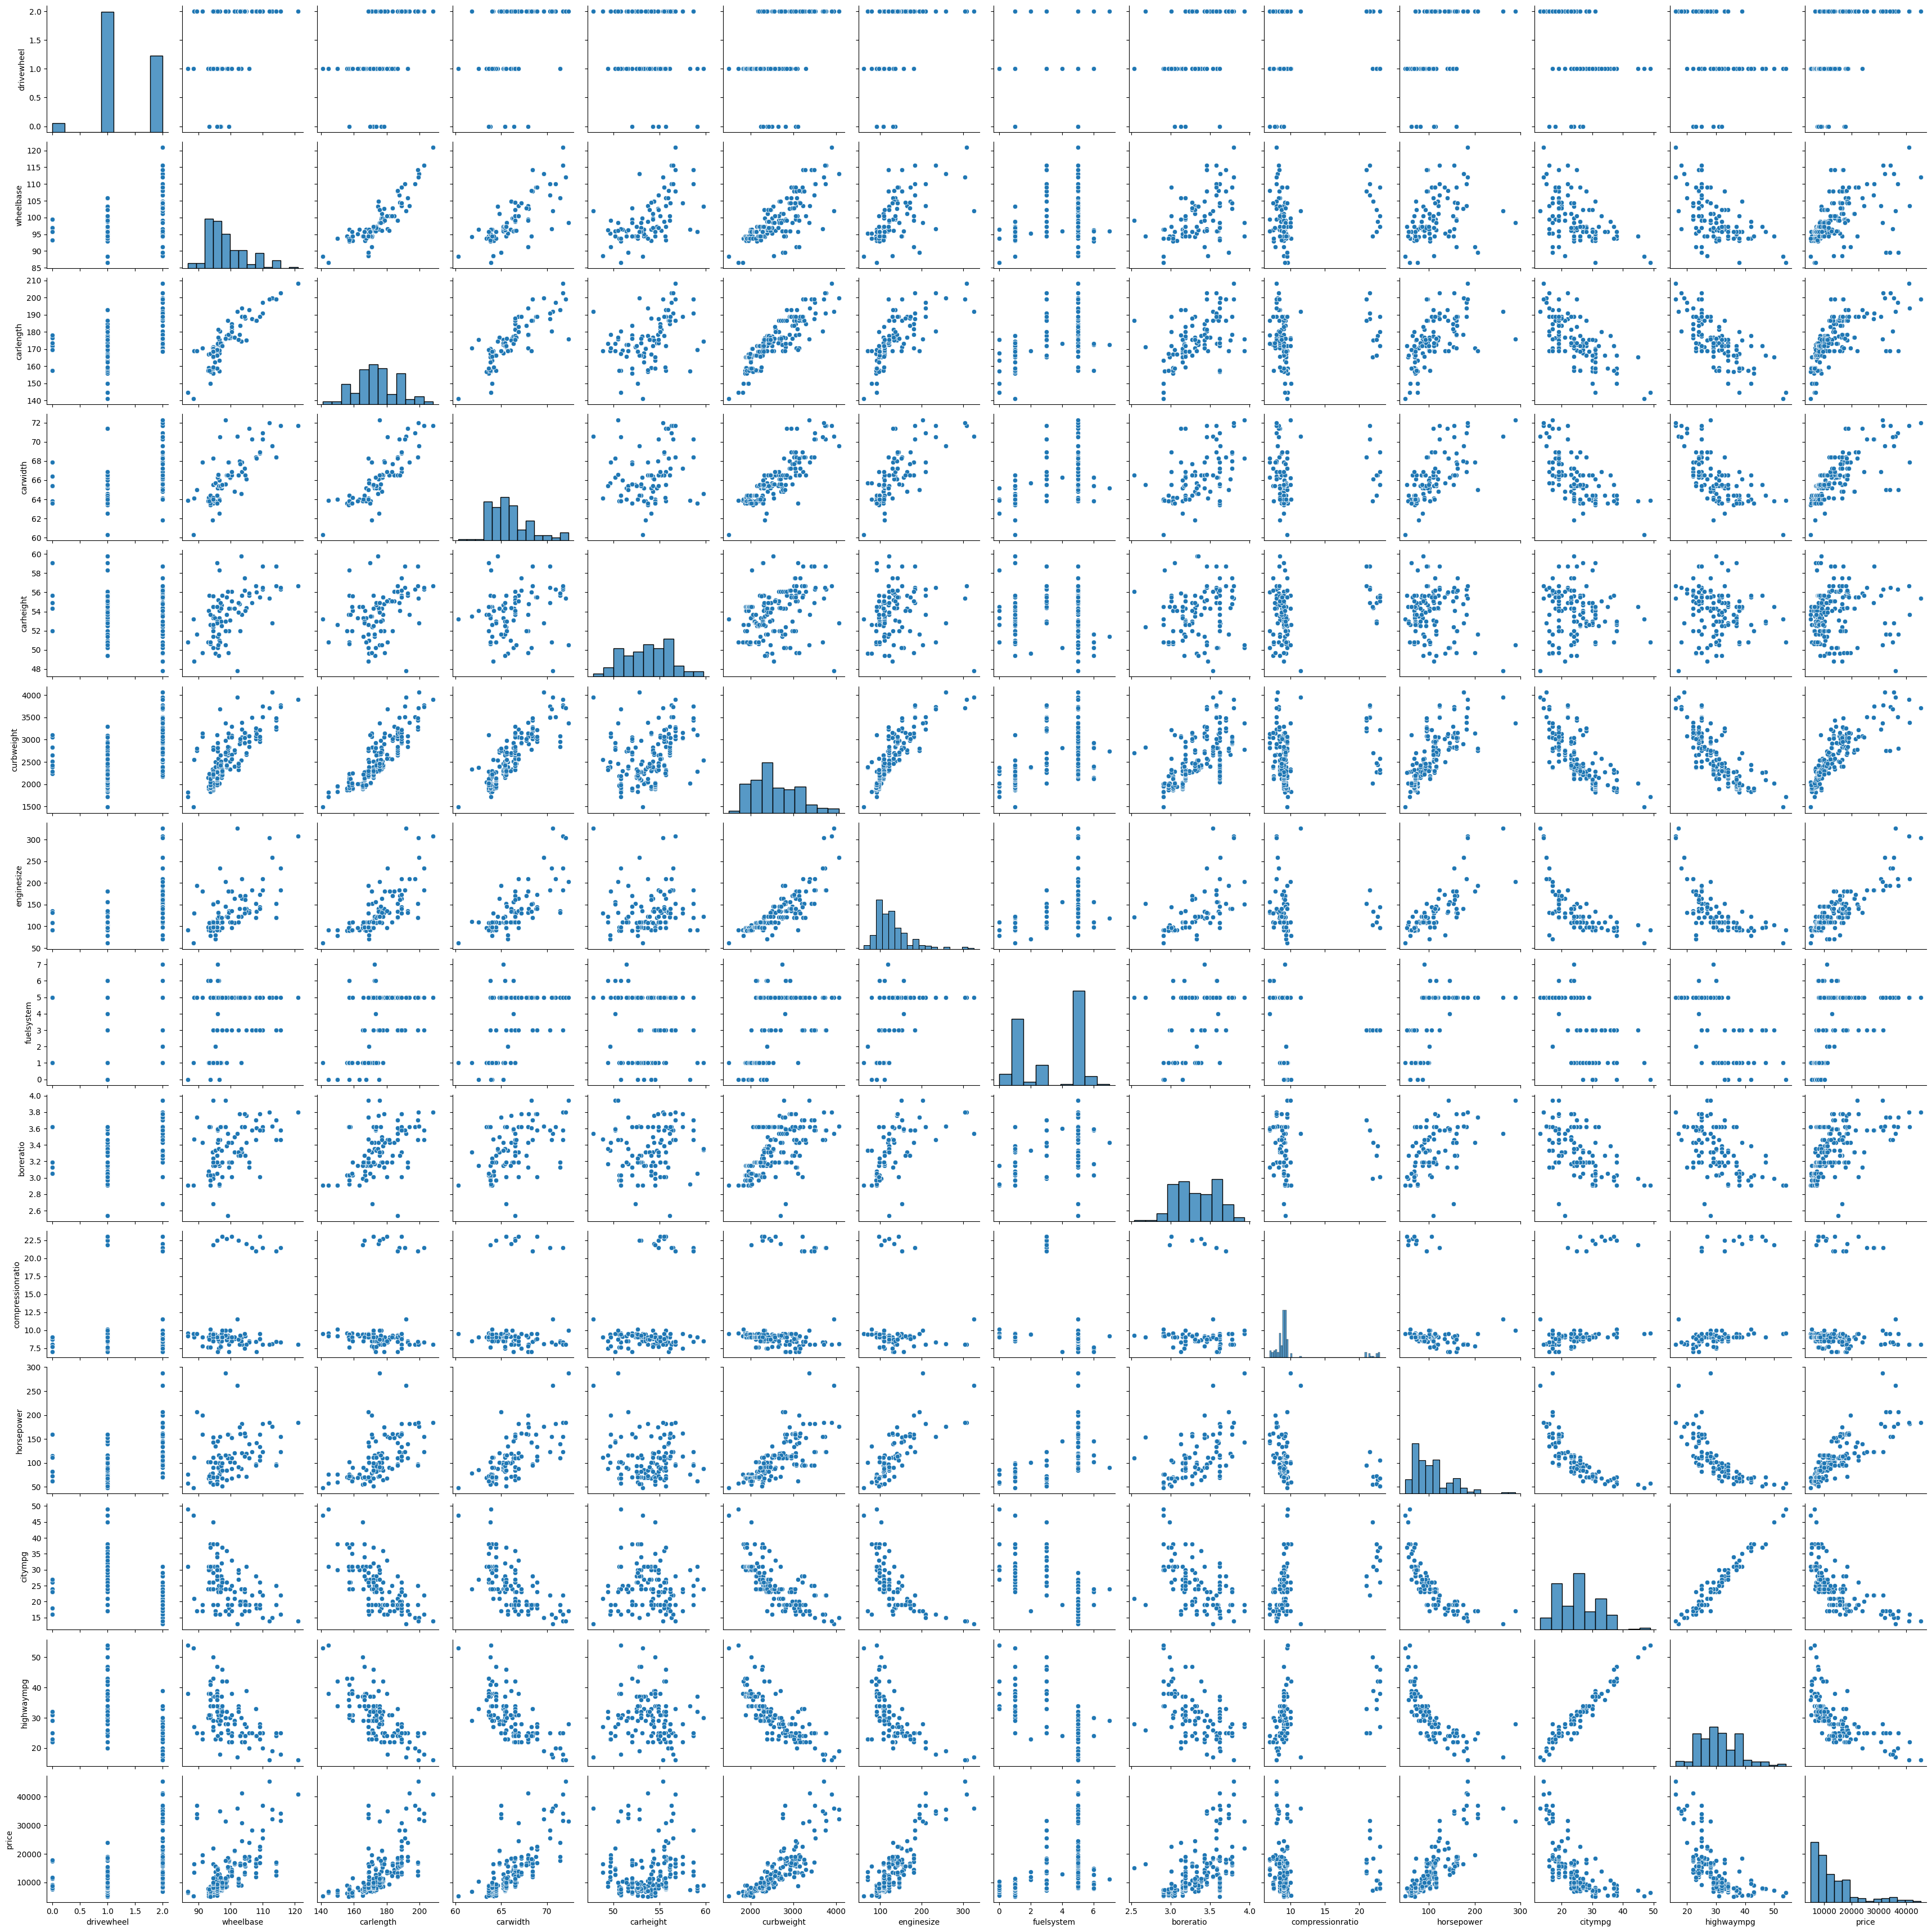

In [58]:
plt.figure(figsize=(40,40))
sns.pairplot(data[['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'price']])
plt.show()

*Plot bar charts for features*

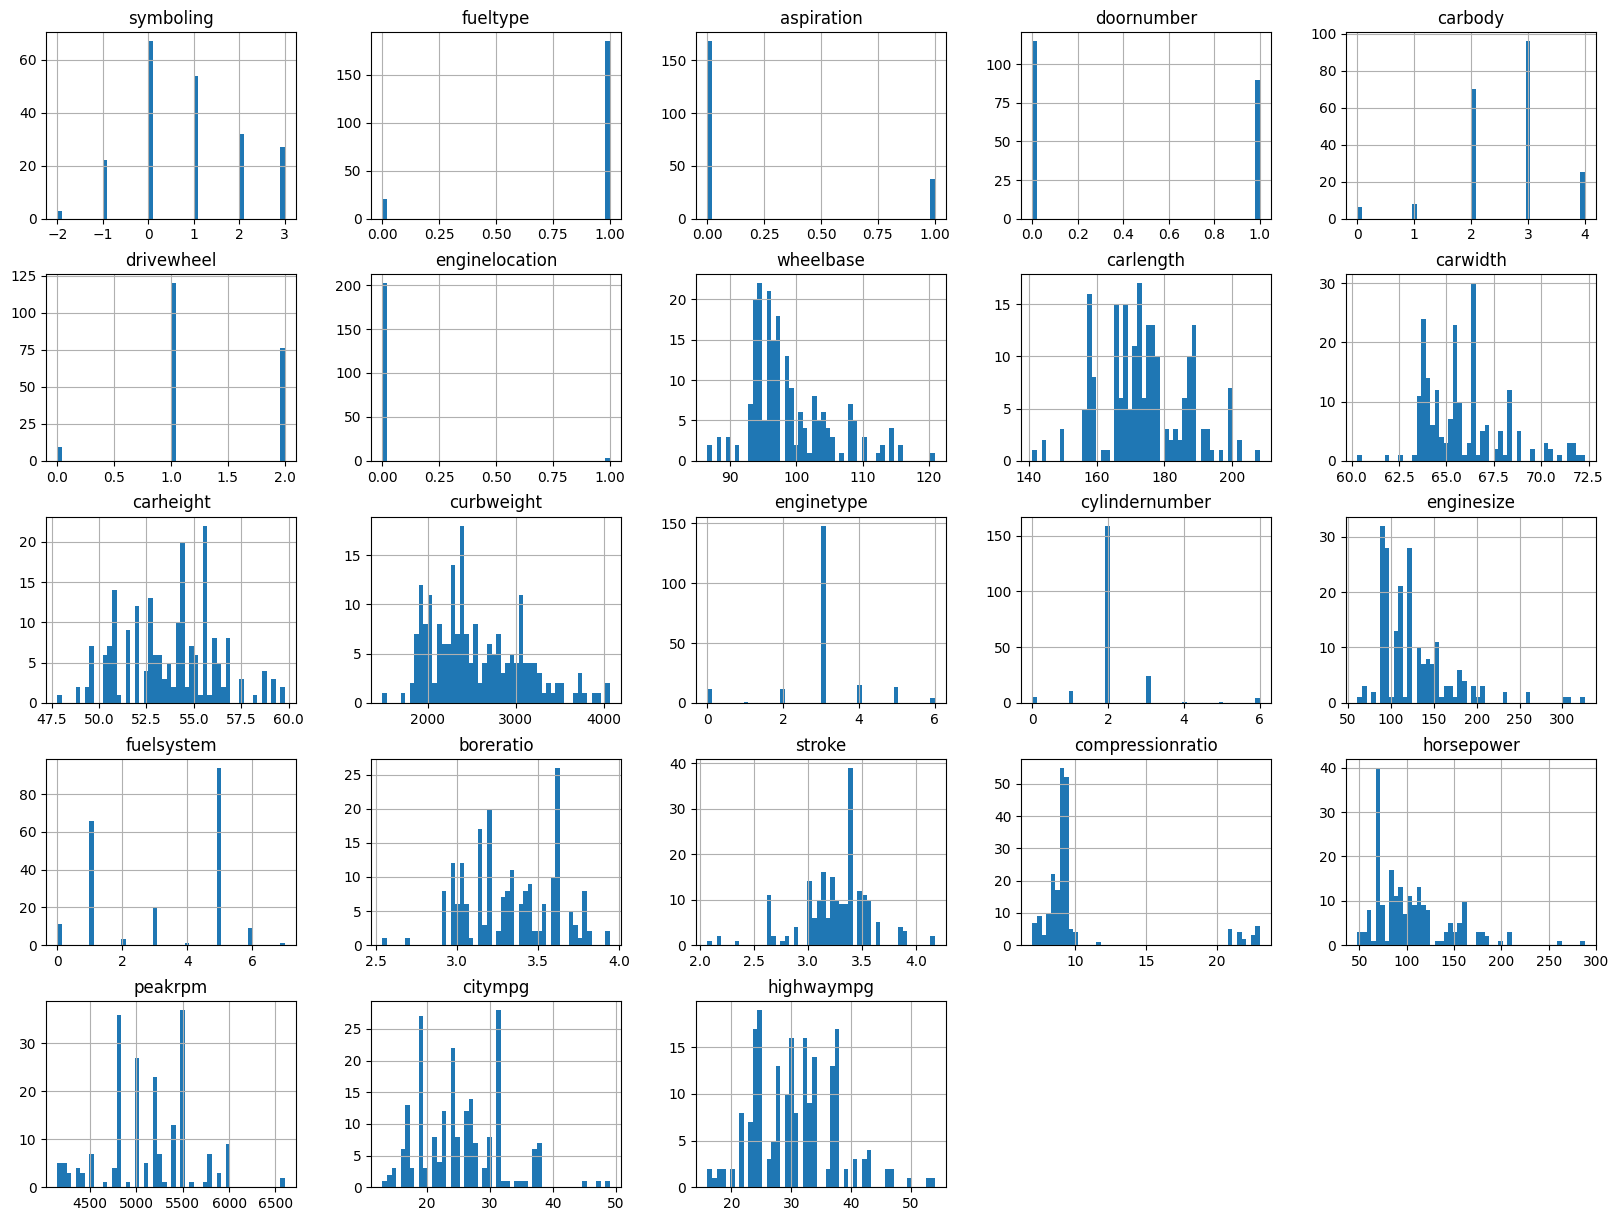

In [59]:
data.iloc[:,:-1].hist(bins = 50, figsize = (20, 15))
plt.show()

*Current columns*

In [60]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### ***Feature Selection***

Drop all features with abs(correlation) with target_value - price less than 0.05

In [61]:
selected_features = ['symboling', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']
X_data, y_data = data[selected_features].to_numpy(), data['price'].to_numpy().reshape(-1,1)
print(X_data.shape, y_data.shape)

(205, 20) (205, 1)


*Data splitting*

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

*Custom Linear Regression model*

In [63]:
class CustomRegression(BaseEstimator, RegressorMixin):
    def __init__(self, standardize=True, learning_rate=0.01, num_iter=10000, eps=10*(-10), verbose=False):
        self.standardize = standardize
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.eps = eps
        self.verbose = verbose
    
    def normalize(self, X):
        mean = X.mean(axis= 0)
        std = X.std(axis = 0)
        X_new = (X - mean)/std
        return X_new, mean, std

    def prepare_X(self, X):
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.array(X[:])
        X_new = np.column_stack((ones, X_new))
        return X_new

    def hypothesis(self, X, theta):
        h_thetha = np.matmul(X, theta.reshape((-1,1)))
        return h_thetha
    
    def cost_function(self, X, y, theta):
        m = X.shape[0]
        if m == 0:
            return None
        J = (1/(2*m)) * np.dot((self.hypothesis(X, theta) - y).reshape(1, -1)[0], (self.hypothesis(X, theta) - y).reshape(1, -1)[0])
        return J

    def derivative(self, X, y, theta):
        m = X.shape[0]
        d_thetha = (1/m)*np.matmul((self.hypothesis(X, theta)-y).reshape((1, X.shape[0]))[0], X)
        return d_thetha
    
    def gradient_descent(self, X, y, theta, print_J = False):
        m = X.shape[0]
        J_history = []
        iteration_history = []
        J = self.cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
        iteration_history.append(0)
        for i in range(self.num_iter):
            delta = self.derivative(X, y, theta)
            theta = theta - self.learning_rate * delta
            J = self.cost_function(X, y, theta)
            if print_J == True:
                print(J)
            J_history.append(J)
            iteration_history.append(i+1)

            #stop condition
            if abs(J_history[-1]-J_history[-2])<self.eps:
                break
        return theta, J_history

    def fit(self, X, y):
        X_new = X.copy()
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X_new)

        X_prep = self.prepare_X(X_new)
        self.theta = np.zeros(X_prep.shape[1])
        self.theta, self.costs = self.gradient_descent(X_prep, y, self.theta)
        return self


    def predict(self, X):
        X_p = X.copy()
        if self.normalize:
            X_p = (X_p - self.mean)/self.std
        X_p = self.prepare_X(X_p)
        predicted = self.hypothesis(X_p,self.theta);
        return predicted
    
    def coef_(self):
        return self.theta

*Check features importance with Theta values*

In [64]:
alpha = 0.01
eps = 10**(-10)
num_iters = 10000

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))

CR = CustomRegression(True, alpha, num_iters, eps)
custom = CR.fit(X_train, y_train)
new_theta = custom.theta

print("new theta shape:", custom.theta.shape)
for i in range(len(custom.theta)):
   if i==0:
      print('Theta {}: {} - Bias; '.format(i, custom.theta[i]))
   else:
      print('Theta {}: {} - {}; '.format(i, custom.theta[i], selected_features[i-1]))

#print(cost_function(X_prep, y_prep, new_theta))

X_train: (164, 20)
y_train: (164, 1)
new theta shape: (21,)
Theta 0: 13223.414634146286 - Bias; 
Theta 1: -127.46464444448351 - symboling; 
Theta 2: 63.16791504934198 - fueltype; 
Theta 3: 223.53051932209885 - aspiration; 
Theta 4: -685.0213705546983 - carbody; 
Theta 5: 407.6747365562992 - drivewheel; 
Theta 6: 1591.8894082745398 - enginelocation; 
Theta 7: 676.5584667466994 - wheelbase; 
Theta 8: -432.6446253561661 - carlength; 
Theta 9: 1794.1956467651357 - carwidth; 
Theta 10: 371.91347964083474 - carheight; 
Theta 11: 850.7152481485539 - curbweight; 
Theta 12: 3988.7238669298977 - enginesize; 
Theta 13: -62.49326795684357 - fuelsystem; 
Theta 14: -596.3463621759124 - boreratio; 
Theta 15: -748.7848301555234 - stroke; 
Theta 16: 684.7022823116312 - compressionratio; 
Theta 17: 58.36359987526887 - horsepower; 
Theta 18: 879.8517031832939 - peakrpm; 
Theta 19: -1628.0368808116816 - citympg; 
Theta 20: 620.2737600498289 - highwaympg; 


*Brief check for train data*

In [65]:
train_prediction = custom.predict(X_train)

print('Check train data')
print('MAE:', metrics.mean_absolute_error(y_train, train_prediction))
print('MSE:', metrics.mean_squared_error(y_train, train_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_prediction)))
print('R^2:', np.sqrt(metrics.r2_score(y_train, train_prediction)))

Check train data
MAE: 1935.8627114062406
MSE: 6454201.201054548
RMSE: 2540.5119958493697
R^2: 0.944339313842299


*Evaluate test datasets results*

In [66]:
test_prediction = custom.predict(X_test)
print("Actual - Predicted")
for exp, act in zip(y_test, test_prediction):
    print(f'{float(exp):.0f} {float(act):.0f} ({float((act - exp) * 100/exp):+.2f}%)')

#print('\n')
#print(cost_function(prepare_X((X_test-mean)/std), test_prediction, new_theta))

Actual - Predicted
30760 24346 (-20.85%)
17859 17482 (-2.11%)
9549 9941 (+4.11%)
11850 13787 (+16.35%)
28248 25030 (-11.39%)
7799 6649 (-14.75%)
7788 8481 (+8.90%)
9258 7037 (-23.99%)
10198 9626 (-5.61%)
7775 8779 (+12.92%)
13295 15801 (+18.85%)
8238 7719 (-6.30%)
18280 15496 (-15.23%)
9988 10515 (+5.28%)
40960 38801 (-5.27%)
6488 6665 (+2.72%)
5151 -2444 (-147.45%)
12629 14535 (+15.09%)
8189 9790 (+19.55%)
9960 10057 (+0.98%)
8495 10977 (+29.21%)
13499 20306 (+50.43%)
8249 7486 (-9.25%)
6479 1552 (-76.05%)
6692 6075 (-9.22%)
41315 24970 (-39.56%)
9639 14015 (+45.40%)
13415 16339 (+21.80%)
7999 4948 (-38.14%)
12940 16833 (+30.08%)
25552 25097 (-1.78%)
6229 6828 (+9.62%)
7898 5677 (-28.12%)
21485 23971 (+11.57%)
7689 8596 (+11.79%)
28176 26048 (-7.55%)
11259 9748 (-13.42%)
10945 9611 (-12.19%)
8916 4866 (-45.43%)
14489 14668 (+1.23%)
7463 8044 (+7.79%)


C:\Users\Ректор\AppData\Local\Temp\ipykernel_2596\480351731.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'{float(exp):.0f} {float(act):.0f} ({float((act - exp) * 100/exp):+.2f}%)')


*Metrics for Custom model*

In [67]:
print("Evaluate metrics for test data")
print('MAE:', metrics.mean_absolute_error(y_test, test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_prediction)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, test_prediction)))

Evaluate metrics for test data
MAE: 2450.884307097895
MSE: 14187600.57612967
RMSE: 3766.64314425055
R^2: 0.905694635237585


*Check Grid Search*

In [68]:
CustomRegressor = CustomRegression()

params = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_iter': [1000, 2000, 5000, 10000],
    'eps': [10**(-5), 10**(-8), 10**(-10)]
}

# Perform grid search
GridCustmobRegressor = GridSearchCV(CustomRegressor, params, cv=5, scoring='r2').fit(X_train, y_train)

grid_prediction = GridCustmobRegressor.predict(X_test)

# Get the best parameters and best score
best_params = GridCustmobRegressor.best_params_
grid_best_score= GridCustmobRegressor.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score (Grid Search) on Train data:", grid_best_score)
print("R^2 Score (Grid Search) Test data:", r2_score(y_test, grid_prediction))

Best Parameters: {'eps': 1e-05, 'learning_rate': 0.001, 'num_iter': 5000}
Best R^2 Score (Grid Search) on Train data: 0.8615830020681361
R^2 Score (Grid Search) Test data: 0.8124415477246792


*Check Random Search*

In [69]:
CustomRegressorR = CustomRegression()

paramsR = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_iter': [1000, 2000, 5000, 10000],
    'eps': [10**(-5), 10**(-8), 10**(-10)]
}


# Perform random search
RandomCustomRegressor = RandomizedSearchCV(CustomRegressorR, paramsR, n_iter=10, cv=5, scoring='r2', random_state=42).fit(X_train, y_train)


random_prediction = RandomCustomRegressor.predict(X_test)

# Get the best parameters and best score
best_params = RandomCustomRegressor.best_params_
random_best_score = RandomCustomRegressor.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score (Random Search) on Train data:", random_best_score)
print("R^2 Score (Random Search) Test data:", r2_score(y_test, random_prediction))

Best Parameters: {'num_iter': 5000, 'learning_rate': 0.001, 'eps': 1e-10}
Best R^2 Score (Random Search) on Train data: 0.8615830020681361
R^2 Score (Random Search) Test data: 0.8124415477246792


*SKlearn Linear Regression model*

In [70]:
lin_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train);

*Briefly check for train data*

In [71]:
train_predicted = lin_reg.predict(X_train)

print('Check for train data')
print('MAE:', metrics.mean_absolute_error(y_train, train_predicted))
print('MSE:', metrics.mean_squared_error(y_train, train_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_predicted)))
print('R^2:', np.sqrt(metrics.r2_score(y_train, train_predicted)))

Check for train data
MAE: 1936.5270459865178
MSE: 6446754.386191347
RMSE: 2539.0459598422685
R^2: 0.9444054250974908


*SKlearn results evaluation*

In [72]:
test_X = X_test
test_y = y_test
test_predicted = lin_reg.predict(test_X)

print("Actual - Predicted")
for exp, act in zip(test_y, test_predicted):
    print(f'{float(exp):.0f} {float(act):.0f} ({float((act - exp) * 100/exp):+.2f}%)')

Actual - Predicted
30760 24244 (-21.18%)
17859 17408 (-2.52%)
9549 9892 (+3.59%)
11850 13840 (+16.79%)
28248 25100 (-11.14%)
7799 6689 (-14.24%)
7788 8562 (+9.94%)
9258 7060 (-23.75%)
10198 9630 (-5.57%)
7775 8880 (+14.22%)
13295 15797 (+18.82%)
8238 7642 (-7.23%)
18280 15563 (-14.86%)
9988 10480 (+4.93%)
40960 38797 (-5.28%)
6488 6747 (+3.99%)
5151 -2552 (-149.55%)
12629 14448 (+14.40%)
8189 9787 (+19.52%)
9960 10058 (+0.98%)
8495 10945 (+28.84%)
13499 20365 (+50.87%)
8249 7548 (-8.50%)
6479 1357 (-79.06%)
6692 6171 (-7.78%)
41315 24830 (-39.90%)
9639 14062 (+45.89%)
13415 16403 (+22.28%)
7999 4943 (-38.21%)
12940 16905 (+30.64%)
25552 25156 (-1.55%)
6229 6932 (+11.29%)
7898 5715 (-27.64%)
21485 24030 (+11.85%)
7689 8661 (+12.64%)
28176 26101 (-7.36%)
11259 9738 (-13.51%)
10945 9637 (-11.95%)
8916 4824 (-45.90%)
14489 14586 (+0.67%)
7463 7926 (+6.20%)


C:\Users\Ректор\AppData\Local\Temp\ipykernel_2596\1365352542.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'{float(exp):.0f} {float(act):.0f} ({float((act - exp) * 100/exp):+.2f}%)')


*Metrics for SKlearn model*

In [73]:
print('Evaluate metrics on test data')
print('MAE:', metrics.mean_absolute_error(y_test, test_predicted))
print('MSE:', metrics.mean_squared_error(y_test, test_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predicted)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, test_predicted)))

Evaluate metrics on test data
MAE: 2465.4942576330277
MSE: 14454975.117779555
RMSE: 3801.9698996414418
R^2: 0.9038229276204751


*SKlearn features importance*

In [74]:
print('Bias : {}'.format(lin_reg.intercept_[0]))
for i in range(len(selected_features)):
    print('{} : {}'.format(selected_features[i], lin_reg.coef_[0][i]))

Bias : -66801.20993572276
symboling : -113.74622171442554
fueltype : 2160.267295619308
aspiration : 807.523889864009
carbody : -798.4120465623993
drivewheel : 722.7794261080093
enginelocation : 11842.878633168539
wheelbase : 121.49865594086458
carlength : -42.449128440923694
carwidth : 840.2817296990385
carheight : 153.96564454297115
curbweight : 1.7206036170159908
enginesize : 101.25481916688476
fuelsystem : -24.760355398416213
boreratio : -2193.9919474898693
stroke : -2347.638680313569
compressionratio : 320.42407797536373
horsepower : -2.334685740631425
peakrpm : 1.8091074463204269
citympg : -320.1489285049706
highwaympg : 136.85943205777167


*SKlearn LinRegModel parametrs*

In [75]:
lin_reg.get_params(deep = True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}